# 3.  Poisson Regression
<b>(a)</b> [5 points] Consider the Poisson distribution parameterized by 
\begin{align*}
p(y;\lambda) = \frac{e^{-\lambda}\lambda^y}{y!}
\end{align*}
Show that the Poisson distribution is in the exponential family, and clearly state the values for $b(y)$, $\eta$, $T(y)$, and $a(\eta)$.
### Answer:

A distribution is in the exponential family if it can be written in the following form:

\begin{align*}p(y;\eta)=b(y)\exp\left\{\eta^TT(y) - a(\eta)\right\}.\end{align*}

The Poisson distribution can be rewritten as 

\begin{align*}p(y;\lambda) = \frac{1}{y!}e^{y\ln \lambda-\lambda}.\end{align*}

Thus the Poisson distribution is in in the exponential family with 

\begin{align*}b(y) = \frac{1}{y!}\end{align*}

\begin{align*}\eta = \ln\lambda\end{align*}

\begin{align*}T(y) = y\end{align*}

\begin{align*}a(\eta) = \lambda = e^\eta.\end{align*}

<b>(b)</b> [3 points] Consider performing regression using a GLM model with a Poisson response variable. What is the canonical response function for the family? (You may use the fact that a Poisson random variable with parameter $\lambda$ has mean $\lambda$.)
### Answer: 

Recall that the function $g$ giving the distributionss mean as a function of the natural parameter ($g(\eta) = E[T(y);\eta]$) is called the canonical response function. Therefore,
\begin{align*}
g(\eta) 
& = E[y;\eta] \\
& = \lambda \\
& = e^\eta.
\end{align*}

<b>(c)</b> [7 points] For a training set $\{(x^{(i)},y^{(i)}); i= 1,\cdots,m\}$, let the log-likelihood of an example be $\log p(y^{(i)}|x^{(i)};\theta)$. By taking the derivative of the log-likelihood with respect to $\theta_j$, derive the stochastic gradient ascent update rule for learning using a GLM model with Poisson responses y and the canonical response function.
### Answer: 

In the GLM setting, we have the follwoing assumpitions:
    
1. $y| x;\theta \sim b(y)\exp\left\{\eta^TT(y) - a(\eta)\right\}$
    
2. $h_\theta(x) = E[T(y)|x;\theta]$
    
where $\eta = \theta^T x$. Therefore, the log-likelihood of an example $(x^{(i)},y^{(i)})$ is 
    
\begin{align*}
l(\theta) 
& = \log p(y^{(i)}|x^{(i)};\theta) \\
& = C + \eta^TT(y^{(i)}) - a(\eta).
\end{align*}
Recall that $\frac{\partial a(\eta)}{\partial\eta}=E[T(y)|\eta]$. 
By taking the derivative of the log-likelihood with respect to $\theta$, we have
    
\begin{align*}
\frac{\partial l}{\partial\theta} 
& = \left(T(y^{(i)}) - E[T(y^{(i)})|\eta]\right)\frac{\partial\eta}{\partial \theta} \\
& = \left(T(y^{(i)}) - h_\theta(x^{(i)})\right)x^{(i)}.
\end{align*}
    
Using  
    \begin{align*}T(y) = y\quad {\rm and} \quad h_\theta(x) = E[y|x;\theta] = e^{\theta x}.\end{align*}
    the  the derivative of the log-likelihood can be written as:
 
\begin{align*}
\frac{\partial l}{\partial\theta} 
& = \left(y^{(i)} - e^{\theta^Tx^{(i)}}\right)x^{(i)}.
\end{align*}
Hence, the update rule using gradint ascent is
\begin{align*}\theta := \theta + \alpha \left(y^{(i)} - e^{\theta^Tx^{(i)}}\right)x^{(i)}.\end{align*}

<b>(d)</b> [7 points] <b>Coding problem.</b> Consider a website that wants to predict its daily traffic. The website owners have collected a dataset of past traffic to their website, along with some features which they think are useful in predicting the number of visitors per day. The dataset is split into train/valid/test sets and follows the same format as Datasets 1-3:
`data/ds4_{train,valid}.csv`
We will apply Poisson regression to model the number of visitors per day. Note that applying Poisson regression in particular assumes that the data follows a Poisson distribution whose natural parameter is a linear combination of the input features (i.e., $\eta = \theta^T x$). In `src/p03d_poisson.py`, implement Poisson regression for this dataset and use gradient ascent to maximize the log-likelihood of $\theta$.
### <font color=red>Answer:</font>

In [1]:
import numpy as np
import src.util as util
from src.linear_model import LinearModel

import matplotlib.pyplot as plt


%load_ext autoreload
%autoreload 2

In [2]:
train_path = 'data/ds4_train.csv'
valid_path = 'data/ds4_valid.csv'


# data sets ready for use in logistic regression 
x_train, y_train = util.load_dataset(train_path,  add_intercept=True)
x_valid, y_valid = util.load_dataset(valid_path,  add_intercept=True)

In [3]:
x_train

array([[1.        , 1.        , 0.        , 0.99204749, 0.32574102],
       [1.        , 0.        , 1.        , 0.47046345, 0.37186578],
       [1.        , 0.        , 1.        , 0.49653283, 0.28985262],
       ...,
       [1.        , 0.        , 1.        , 0.5731734 , 0.42840612],
       [1.        , 0.        , 1.        , 0.60116637, 0.94911474],
       [1.        , 0.        , 1.        , 0.32460144, 0.40509498]])

In [4]:
class PoissonRegression(LinearModel):
    """Poisson Regression.

    Example usage:
        > clf = PoissonRegression(step_size=lr)
        > clf.fit(x_train, y_train)
        > clf.predict(x_eval)
    """
 
    def fit(self, x, y):
        """Run gradient ascent to maximize likelihood for Poisson regression.

        Args:
            x: Training example inputs. Shape (m, n).
            y: Training example labels. Shape (m,).
        """
        # *** START CODE HERE ***
        m, n = x.shape
        if self.theta is None:
            self.theta = np.zeros(n)
    
        for _ in range(self.max_iter):
            step = self.step_size * x.T @ (y - np.exp(x@self.theta))
            if np.linalg.norm(step, 1) <= self.eps:
                self.theta += step
                break
            else:
                self.theta += step
                
            
        # *** END CODE HERE ***

    def predict(self, x):
        """Make a prediction given inputs x.

        Args:
            x: Inputs of shape (m, n).

        Returns:
            Floating-point prediction for each input, shape (m,).
        """
        # *** START CODE HERE ***
        return np.exp(x@self.theta)
        # *** END CODE HERE ***

In [46]:
clf = PoissonRegression(step_size=4e-11, max_iter = 10000)
clf.fit(x_train, y_train)
clf.theta

array([7.3663442 , 3.93318364, 3.43316055, 2.00016609, 4.40044556])

In [47]:
y_pred_t = clf.predict(x_train)
np.sqrt(np.mean((y_pred_t - y_train)**2))

1912.9557303815895

In [26]:
y_pred = clf.predict(x_valid)

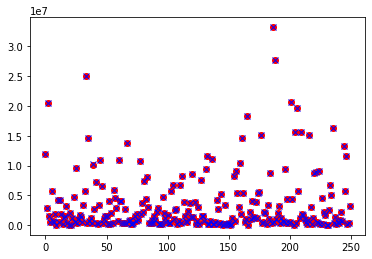

In [27]:
plt.plot(y_valid, 'ro')
plt.plot(y_pred, 'bx')

In [28]:
np.sqrt(np.mean((y_pred - y_valid)**2))

1992.3726908373685